# Páginas para programar python

1. www.mybinder.org
2. www.kaggle.com
3. www.jupyter.org/try
4. `github jobish` https://mybinder.org/v2/gh/jobish03/jobish03-Visualizacion_de_datos_para_la_toma_de_decisiones/main?filepath=welcome_binder.ipynb

Los paquetes hay que incluir en el archivo `requirements.txt`

# Alejandro Junco de la Vega // A00828426
## Profesor: Jobish Vallikavungal Devassia
IN2039.4 (Gpo 6)


Introduccion

### Descargue un a base de datos de "Video Game Sales" de un sitio llamado Kaggle.com, (https://www.kaggle.com/gregorut/videogamesales) Este análisis son de los datos de ventas de más de 16.500 juegos. Este conjunto de datos contiene una lista de videojuegos con ventas superiores a 100.000 copias. Los variables criticas los cuales se representan como indicadores de las columnas son siguientes :
1. Clasificación: clasificación de las ventas generales
2. Nombre: el nombre del juego
3. Plataforma: plataforma del lanzamiento del juego (es decir, PC, PS4, etc.)
4. Año: año de lanzamiento del juego
5. Género: género del juego
6. NA_Sales - Ventas en Norteamérica (en millones)
7. EU_Sales - Ventas en Europa (en millones)
8. JP_Sales - Ventas en Japón (en millones)
9. Global_Sales: ventas totales en todo el mundo.

### Preguntas críticas:
1. ¿Cual compañía tiene más ventas globales?
2. ¿Qué tendencia tienen los años (vglobales) ?
3. ¿De qué publisher son los juegos que tienen más ventas?
4. ¿Ranks de plataformas?

### Los stakeholders que  estarían interesados en las preguntas criticas serian
1. Compañías de videojuegos como Activision Blizzard, Electronic Arts (EA), Take-Two Interactive, y Zynga. 
2. Clientes interesados en comprar videojuegos
3. Inversionistas
4. Gobiernos


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go

In [12]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.


In [3]:
df=pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
2,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
3,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
4,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62


## 1. En qué años se utilizó más la plataforma

Text(0.5, 1.0, 'Platform vs Year')

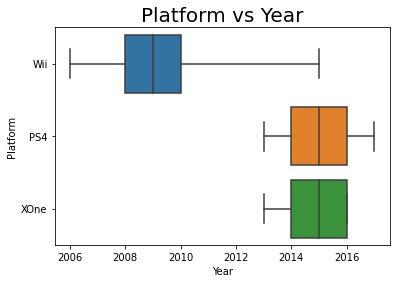

In [4]:
sns.boxplot(x=df['Year'], y=df['Platform'],whis=(0,100)).set_title('Platform vs Year',fontsize=20)

### Este diagrama de cajas y bigotes hace muy evidente cómo la plataforma de Wii está muy presente entre el 2008 y el 2010 aunque sus ventas iniciales empezaron en el 2006 y se extendieron hasta el 2015, por el otro lado ambas plataformas la de PS4 y Xbox One comenzaron a vender juegos en el 2013 y se extienden hasta la última fecha de registro.

### ¿Cuántos juegos destacaron  en JP,NA,EU?

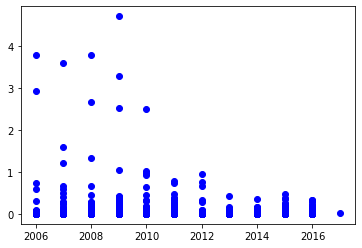

In [5]:
plt.scatter(y = df['JP_Sales'], x = df ['Year'],
color = 'blue')

### Este diagrama hace muy evidente que las grandes ventas de Wii Xbox One y PS4 se concentraron mayormente entre el 2006 y el 2010. Pude identificar visualmente a 7 videojuegos que destacaron durante estos años en Japon con récords de entre 3 y 4 millones de dolares.

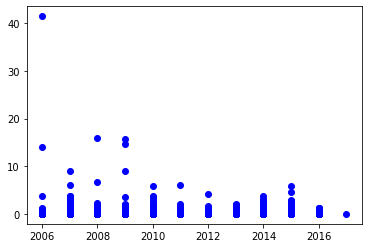

In [6]:
plt.scatter(y = df['NA_Sales'], x = df ['Year'],
color = 'blue')

### Este diagrama hace muy evidente que las grandes ventas de Wii Xbox One y PS4 se concentraron mayormente entre el 2006 y el 2010. Pude identificar visualmente a 1 videojuego que destacaro durante estos años en Norte America con ventas mucho mas elevadas a las de japon, con records de arriba de 40 millones de dollares.

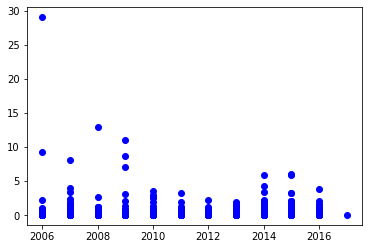

In [7]:
plt.scatter(y = df['EU_Sales'], x = df ['Year'],
color = 'blue')

### Por ultimo este diagrama hace muy evidente que las grandes ventas de Wii Xbox One y PS4 en Europa se distribuyen a traves de todos los años. Pude identificar visualmente a 1 videojuego que destaco durante estos años en Europa con ventas mucho mas elevadas a las de japon, con records de arriba de 30 millones de dollares. Tambien hubo 6 videojuegos que generaron cerca de 10 millones de dollares.

En que años se elaboraron mas juegos de las diversas plataformas?

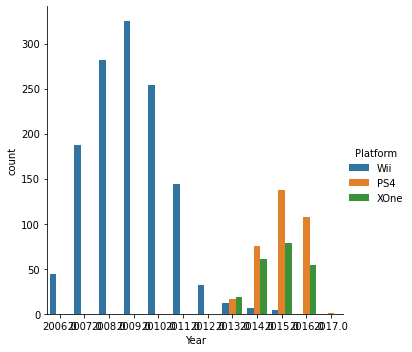

In [8]:
sns.catplot(x='Year',
            data=df,
            kind='count',
            hue='Platform'
           )

### Es muy evidente como en el 2016 se empezaron a fabricar juegos para la consola de Wii, en el 2009 fue su pico de mayores juegos producidos en ese año, se producieron cerca de 300 juegos ese año para el Wii. Cerca del 2013 se empezó a producir juegos para el Xbox one y el PS4. En ese año específicamente del 2013 hubo más juegos de xbox One que de PS4 pero a cómo pasó el tiempo se empezaron a producir cada vez más juegos de PS4.

## ¿Qué región tiene mayor correlación con las ventas globales?

In [9]:
import statsmodels.api as sm

#importacion de libreria de datos de regresion y estadistica^
model = sm.OLS.from_formula('Global_Sales~NA_Sales',data = df) 
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                 6.381e+04
Date:                Thu, 02 Dec 2021   Prob (F-statistic):               0.00
Time:                        09:45:49   Log-Likelihood:                -1219.7
No. Observations:                1874   AIC:                             2443.
Df Residuals:                    1872   BIC:                             2455.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0278      0.011     -2.497      0.013      -0.050      -0.006
NA_Sales       2.0327      0.008    252.605      0.000       2.017       2.049
==============================================================================
Omnibus:                     1879.953   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           201099.070
Skew:                           4.546   Prob(JB):                         0.00
Kurtosis:                      52.928   Cond. No.                         1.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
import statsmodels.api as sm

#importacion de libreria de datos de regresion y estadistica^
model = sm.OLS.from_formula('Global_Sales~EU_Sales',data = df) 
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                 4.431e+04
Date:                Thu, 02 Dec 2021   Prob (F-statistic):               0.00
Time:                        09:45:49   Log-Likelihood:                -1549.8
No. Observations:                1874   AIC:                             3104.
Df Residuals:                    1872   BIC:                             3115.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0749      0.013      5.695      0.000       0.049       0.101
EU_Sales       2.7541      0.013    210.488      0.000       2.728       2.780
==============================================================================
Omnibus:                      742.561   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           576345.813
Skew:                           0.151   Prob(JB):                         0.00
Kurtosis:                      88.913   Cond. No.                         1.27
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
import statsmodels.api as sm

#importacion de libreria de datos de regresion y estadistica^
model = sm.OLS.from_formula('Global_Sales~JP_Sales',data = df) 
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     3113.
Date:                Thu, 02 Dec 2021   Prob (F-statistic):               0.00
Time:                        09:45:49   Log-Likelihood:                -3635.6
No. Observations:                1874   AIC:                             7275.
Df Residuals:                    1872   BIC:                             7286.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3366      0.040      8.520      0.000       0.259       0.414
JP_Sales       8.5131      0.153     55.799      0.000       8.214       8.812
==============================================================================
Omnibus:                     3616.809   Durbin-Watson:                   1.173
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         14593618.205
Skew:                          14.187   Prob(JB):                         0.00
Kurtosis:                     434.385   Cond. No.                         3.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Me tomé el tiempo de comparar cada región contra las ventas globales me di cuenta qué la región de Norte América era la que tenía una correlación más fuerte con las ventas globales ya que era de .971, luego seguia Europa con una correlación de .959. A mí sorpresa encontré qué Japón tenía muy poca correlación a comparación de las ventas globales ya que era de .625

## Hallazgos y dificultades: 

### Cómo tengo una computadora con poco poder de procesamiento se me dificultó mucho tener archivos tan grandes en el compu ya que por coincidencia tampoco tenía espacio. Para resolver este problema decidí hacer dos cosas la primera, le pedí prestada la computadora mi mamá la cual tenía mejor capacidad para procesar y segundo que nada depure el archivo para analizar únicamente las plataformas que habían marcado mi infancia las cuáles son Wii, Xbox y PS4. Durante este proceso aprendí mucho de programación herramientas " open source " como Jupyter las cuales fueron mucho de mi agrado. Por último me gustaría agradecerle de corazón al profe por haberse tomado el tiempo y despertar las mañanas con nosotros para darnos las herramientas para hacer esta presentación posible.